Descargando los datos de prueba y test

In [1]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2021-06-08 17:00:55--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

loan_train.csv      100%[===================>]  22.56K  --.-KB/s    in 0s      

2021-06-08 17:00:55 (56.1 MB/s) - ‘loan_train.csv’ saved [23101/23101]



In [2]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2021-06-08 17:00:55--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

loan_test.csv       100%[===================>]   3.56K  --.-KB/s    in 0s      

2021-06-08 17:00:55 (107 MB/s) - ‘loan_test.csv’ saved [3642/3642]



In [3]:
!pip install scikit-learn==0.23.1

In [4]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import jaccard_score
from sklearn.metrics import log_loss
from sklearn.metrics import f1_score
from sklearn import preprocessing
import matplotlib.pyplot as plt
import scipy.optimize as opt
from sklearn import metrics
from sklearn import svm
from math import sqrt
import pandas as pd
import numpy as np
import pylab as pl
import itertools
%matplotlib inline 

In [5]:
#Storing the movie information into a pandas dataframe
loan_train_df = pd.read_csv('loan_train.csv')
#Storing the user information into a pandas dataframe
loan_test_df = pd.read_csv('loan_test.csv')

In [6]:
len(loan_train_df)

346

In [7]:
loan_train_df.tail(5)

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
341,394,394,COLLECTION,800,15,9/11/2016,9/25/2016,32,High School or Below,male
342,395,395,COLLECTION,1000,30,9/11/2016,10/10/2016,25,High School or Below,male
343,397,397,COLLECTION,800,15,9/12/2016,9/26/2016,39,college,male
344,398,398,COLLECTION,1000,30,9/12/2016,11/10/2016,28,college,male
345,399,399,COLLECTION,1000,30,9/12/2016,10/11/2016,26,college,male


In [8]:
loan_train_df.describe()

,Unnamed: 0,Unnamed: 0.1,Principal,terms,age
count,346.000000,346.000000,346.000000,346.000000,346.000000
mean,202.167630,202.167630,943.641618,22.653179,30.939306
std,115.459715,115.459715,109.425530,7.991006,6.039418
min,0.000000,0.000000,300.000000,7.000000,18.000000
25%,107.250000,107.250000,900.000000,15.000000,27.000000
50%,204.500000,204.500000,1000.000000,30.000000,30.000000
75%,298.750000,298.750000,1000.000000,30.000000,35.000000
max,399.000000,399.000000,1000.000000,30.000000,51.000000


In [9]:
loan_train_df.dtypes

Unnamed: 0         int64
Unnamed: 0.1       int64
loan_status       object
Principal          int64
terms              int64
effective_date    object
due_date          object
age                int64
education         object
Gender            object
dtype: object

Transform datetime columns and creating news features

In [10]:
loan_train_df['effective_date'] = pd.to_datetime(loan_train_df['effective_date'])
loan_train_df['due_date'] = pd.to_datetime(loan_train_df['due_date'])
# creatting news features
loan_train_df['diff_days'] = (loan_train_df['due_date']-loan_train_df['effective_date']).dt.days
loan_train_df['day_of_pay'] = loan_train_df['effective_date'].dt.day
loan_train_df['day_of_week_pay'] = loan_train_df['effective_date'].dt.dayofweek

# applying the same to test df
loan_test_df['effective_date'] = pd.to_datetime(loan_test_df['effective_date'])
loan_test_df['due_date'] = pd.to_datetime(loan_test_df['due_date'])
# creatting news features
loan_test_df['diff_days'] = (loan_test_df['due_date']-loan_test_df['effective_date']).dt.days
loan_test_df['day_of_pay'] = loan_test_df['effective_date'].dt.day
loan_test_df['day_of_week_pay'] = loan_test_df['effective_date'].dt.dayofweek

Dropping first and second columns because it looks index and have the same values

In [11]:
all(loan_train_df['Unnamed: 0'] == loan_train_df['Unnamed: 0.1'])

True

In [12]:
loan_train_df = loan_train_df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)
loan_test_df = loan_test_df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)
loan_train_df.head(5)

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,diff_days,day_of_pay,day_of_week_pay
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,29,8,3
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,29,8,3
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,14,8,3
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,29,9,4
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,29,9,4


Getting the main columns and get their values for train and test

In [13]:
columns_x = ['Principal', 'terms', 'age', 'education', 'Gender', 'diff_days', 'diff_days', 'day_of_pay', 'day_of_week_pay']
X_train = loan_train_df[columns_x] .values  #.astype(float)
# test
X_test = loan_test_df[columns_x] .values  #.astype(float)
# showing the train
X_train[0:5]

array([[1000, 30, 45, 'High School or Below', 'male', 29, 29, 8, 3],
       [1000, 30, 33, 'Bechalor', 'female', 29, 29, 8, 3],
       [1000, 15, 27, 'college', 'male', 14, 14, 8, 3],
       [1000, 30, 28, 'college', 'female', 29, 29, 9, 4],
       [1000, 30, 29, 'college', 'male', 29, 29, 9, 4]], dtype=object)

In [14]:
y_train = loan_train_df['loan_status'].values
y_test = loan_test_df['loan_status'].values
# Printing y_train
y_train[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

Encoding some variables as gender, education, 

In [15]:
le_gender = preprocessing.LabelEncoder()
le_gender.fit(loan_train_df.Gender.unique().tolist())
idx = columns_x.index('Gender')
X_train[:,idx] = le_gender.transform(X_train[:,idx])
X_test[:,idx] = le_gender.transform(X_test[:,idx]) 


le_edu = preprocessing.LabelEncoder()
le_edu.fit(loan_train_df.education.unique())
idx = columns_x.index('education')
X_train[:,idx] = le_edu.transform(X_train[:,idx])
X_test[:,idx] = le_edu.transform(X_test[:,idx])
del idx

le_status = preprocessing.LabelEncoder()
le_status.fit(loan_train_df.loan_status.unique())
y_train = le_status.transform(y_train)
y_test = le_status.transform(y_test)

In [16]:
X_train[0:5]

array([[1000, 30, 45, 1, 1, 29, 29, 8, 3],
       [1000, 30, 33, 0, 0, 29, 29, 8, 3],
       [1000, 15, 27, 3, 1, 14, 14, 8, 3],
       [1000, 30, 28, 3, 0, 29, 29, 9, 4],
       [1000, 30, 29, 3, 1, 29, 29, 9, 4]], dtype=object)

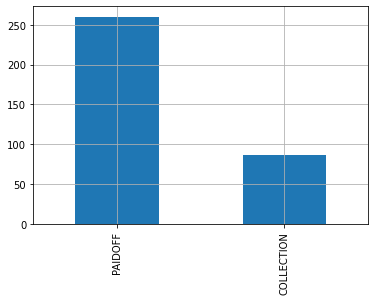

In [17]:
loan_train_df['loan_status'].value_counts().plot(kind='bar')
plt.grid()

In [18]:
#Normalize the data
X_train = preprocessing.StandardScaler().fit(X_train).transform(X_train.astype(float))
X_test = preprocessing.StandardScaler().fit(X_test).transform(X_test.astype(float))
X_train[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.64691859,  0.42056004,
         0.53257725,  0.53257725, -3.01861447, -0.26122054],
       [ 0.51578458,  0.92071769,  0.34170148, -1.5212695 , -2.37778177,
         0.53257725,  0.53257725, -3.01861447, -0.26122054],
       [ 0.51578458, -0.95911111, -0.65321055,  1.10178323,  0.42056004,
        -0.88417105, -0.88417105, -3.01861447, -0.26122054],
       [ 0.51578458,  0.92071769, -0.48739188,  1.10178323, -2.37778177,
         0.53257725,  0.53257725, -2.14969549,  0.12175534],
       [ 0.51578458,  0.92071769, -0.3215732 ,  1.10178323,  0.42056004,
         0.53257725,  0.53257725, -2.14969549,  0.12175534]])

# Trainning  a KNN  model

Finding the best K

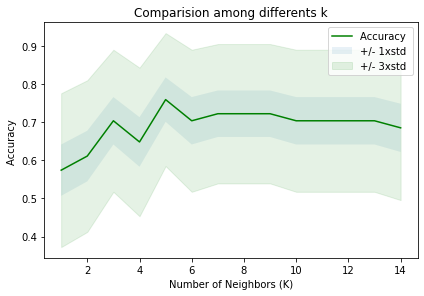

In [19]:
Ks = 15
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1, Ks):
    # Train Model and Predict
    neigh = KNeighborsClassifier(n_neighbors=n).fit(X_train, y_train)
    yhat = neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1] = np.std(yhat == y_test) / np.sqrt(yhat.shape[0])

plt.plot(range(1, Ks), mean_acc, 'g')
plt.fill_between(
    range(1, Ks),
    mean_acc - 1 * std_acc,
    mean_acc + 1 * std_acc,
    alpha=0.10)
plt.fill_between(
    range(1, Ks),
    mean_acc - 3 * std_acc,
    mean_acc + 3 * std_acc,
    alpha=0.10,
    color="green")
plt.legend(('Accuracy ', '+/- 1xstd', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.title('Comparision among differents k')
plt.show()

The best k neighbors is 5

In [20]:
k = 5
# Train Model and Predict
neigh = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
neigh

KNeighborsClassifier()

In [21]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([1, 1, 1, 0, 0])

In [22]:
print("Train set Accuracy accuracy score: ",
      metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy accuracy score: ",
      metrics.accuracy_score(y_test, yhat))
print("Train set Accuracy jaccard: ",
      jaccard_score(y_train, neigh.predict(X_train), average='binary'))
print("Test set Accuracy jaccard: ",
      jaccard_score(y_test, yhat, average='binary'))
print("Train set Accuracy f1 score: ",
      f1_score(y_train, neigh.predict(X_train), average='weighted'))
print("Test set Accuracy f1 score: ",
      f1_score(y_test, yhat, average='weighted'))
print("Train set Accuracy log loss: ",
      log_loss(y_train, neigh.predict(X_train)))
print("Test set Accuracy log loss: ",
      log_loss(y_test, yhat))

Train set Accuracy accuracy score:  0.8323699421965318
Test set Accuracy accuracy score:  0.7592592592592593
Train set Accuracy jaccard:  0.8073089700996677
Test set Accuracy jaccard:  0.7291666666666666
Train set Accuracy f1 score:  0.8224760377514544
Test set Accuracy f1 score:  0.7491655510932619
Train set Accuracy log loss:  5.7898318335244445
Test set Accuracy log loss:  8.315009072468156


# Trainning  a Decision Tree model

In [23]:
deTree = DecisionTreeClassifier(criterion="entropy", max_depth=4)
deTree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [24]:
yhat = deTree.predict(X_test)
yhat[0:5]

array([1, 1, 1, 1, 1])

In [25]:
print("Train set Accuracy accuracy score: ",
      metrics.accuracy_score(y_train, deTree.predict(X_train)))
print("Test set Accuracy accuracy score: ",
      metrics.accuracy_score(y_test, yhat))
print("Train set Accuracy jaccard: ",
      jaccard_score(y_train, deTree.predict(X_train), average='binary'))
print("Test set Accuracy jaccard: ",
      jaccard_score(y_test, yhat, average='binary'))
print("Train set Accuracy f1 score: ",
      f1_score(y_train, deTree.predict(X_train), average='weighted'))
print("Test set Accuracy f1 score: ",
      f1_score(y_test, yhat, average='weighted'))
print("Train set Accuracy log loss: ",
      log_loss(y_train, deTree.predict(X_train)))
print("Test set Accuracy log loss: ",
      log_loss(y_test, yhat))

Train set Accuracy accuracy score:  0.7630057803468208
Test set Accuracy accuracy score:  0.7592592592592593
Train set Accuracy jaccard:  0.7559523809523809
Test set Accuracy jaccard:  0.7450980392156863
Train set Accuracy f1 score:  0.6957432135193649
Test set Accuracy f1 score:  0.7144140000438048
Train set Accuracy log loss:  8.185665993605118
Test set Accuracy log loss:  8.31505349454761


# Trainning  a SVM model

In [26]:
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)

SVC()

In [27]:
yhat = deTree.predict(X_test)
yhat[0:5]

array([1, 1, 1, 1, 1])

In [28]:
print("Train set Accuracy accuracy score: ",
      metrics.accuracy_score(y_train, clf.predict(X_train)))
print("Test set Accuracy accuracy score: ",
      metrics.accuracy_score(y_test, yhat))
print("Train set Accuracy jaccard: ",
      jaccard_score(y_train, clf.predict(X_train), average='binary'))
print("Test set Accuracy jaccard: ",
      jaccard_score(y_test, yhat, average='binary'))
print("Train set Accuracy f1 score: ",
      f1_score(y_train, clf.predict(X_train), average='weighted'))
print("Test set Accuracy f1 score: ",
      f1_score(y_test, yhat, average='weighted'))
print("Train set Accuracy log loss: ",
      log_loss(y_train, clf.predict(X_train)))
print("Test set Accuracy log loss: ",
      log_loss(y_test, yhat))

Train set Accuracy accuracy score:  0.7745664739884393
Test set Accuracy accuracy score:  0.7592592592592593
Train set Accuracy jaccard:  0.7692307692307693
Test set Accuracy jaccard:  0.7450980392156863
Train set Accuracy f1 score:  0.6957377294626578
Test set Accuracy f1 score:  0.7144140000438048
Train set Accuracy log loss:  7.786378402897654
Test set Accuracy log loss:  8.31505349454761


# Trainning  a Logistic Regression model

In [29]:
logReg = LogisticRegression(C=0.01, solver='liblinear')
logReg.fit(X_train, y_train)

LogisticRegression(C=0.01, solver='liblinear')

In [30]:
print("Train set Accuracy accuracy score: ",
      metrics.accuracy_score(y_train, logReg.predict(X_train)))
print("Test set Accuracy accuracy score: ",
      metrics.accuracy_score(y_test, yhat))
print("Train set Accuracy jaccard: ",
      jaccard_score(y_train, logReg.predict(X_train), average='binary'))
print("Test set Accuracy jaccard: ",
      jaccard_score(y_test, yhat, average='binary'))
print("Train set Accuracy f1 score: ",
      f1_score(y_train, logReg.predict(X_train), average='weighted'))
print("Test set Accuracy f1 score: ",
      f1_score(y_test, yhat, average='weighted'))
print("Train set Accuracy log loss: ",
      log_loss(y_train, logReg.predict(X_train)))
print("Test set Accuracy log loss: ",
      log_loss(y_test, yhat))

Train set Accuracy accuracy score:  0.7283236994219653
Test set Accuracy accuracy score:  0.7592592592592593
Train set Accuracy jaccard:  0.7034700315457413
Test set Accuracy jaccard:  0.7450980392156863
Train set Accuracy f1 score:  0.7154813011977599
Test set Accuracy f1 score:  0.7144140000438048
Train set Accuracy log loss:  9.383498723049495
Test set Accuracy log loss:  8.31505349454761
